In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt    
import nltk   
from nltk.corpus import stopwords   
import re  
import seaborn as sns  
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer   
from sklearn.svm import SVC  
from sklearn.metrics import accuracy_score
from sklearn.metrics import ConfusionMatrixDisplay,classification_report
from sklearn.preprocessing import LabelBinarizer

In [2]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [4]:
cov_data = pd.read_csv(r'/content/COVIDSenti-A.csv')
cov_data

,tweet,label
0,Coronavirus | Human Coronavirus Types | CDC ht...,neu
1,"@shehryar_taseer That‚Äôs üíØ true , \nCorona...",neu
2,"TLDR: Not SARS, possibly new coronavirus. Diff...",neg
3,Disease outbreak news from the WHO: Middle Eas...,neu
4,China - Media: WSJ says sources tell them myst...,neu
...,...,...
29995,CDC: Re-test confirms Westerdam cruise ship pa...,neu
29996,Two doctors die of coronavirus within 24 hours...,neu
29997,BEIJING - The lockdown of Guo Jing's neighbour...,neu
29998,#CoronavirusOutbreak in #Balochistan !!\n#CPEC...,neu


In [8]:
cov_data.isnull().sum()

tweet    0
label    0
dtype: int64

In [9]:
cov_data['label'].value_counts()

neu    22949
neg     5083
pos     1968
Name: label, dtype: int64

In [7]:
stop_words = set(stopwords.words('english'))

In [10]:
def clean_tweet(tweet):
  if type(tweet) == float:
    return ""
  temp = tweet.lower() # Words in lower case
  temp = re.sub("'","",temp) # Removing contractions in English
  temp = re.sub("@[A-Za-z0-9_]+","", temp) #Removing mentions     
  temp = re.sub("#[A-Za-z0-9_]+","", temp) #Removing hashtags
  temp = re.sub(r'http\S+', '', temp) #Removing links
  temp = re.sub('\[().*!?\]', ' ', temp) # Removing punctuations
  temp = re.sub("[^a-z0-9]", " ", temp)
  temp = temp.split() # Splitting the sentence into individual words
  temp = [w for w in temp if not w in stop_words]
  temp = " ".join(word for word in temp)
  return temp

In [12]:
cov_data['tweet'] = cov_data['tweet'].apply(clean_tweet)
cov_data

,tweet,label
0,coronavirus human coronavirus types cdc,neu
1,true corona virus swine flue bird flu december...,neu
2,tldr sars possibly new coronavirus difficult c...,neg
3,disease outbreak news middle east respiratory ...,neu
4,china media wsj says sources tell mystery pneu...,neu
...,...,...
29995,cdc test confirms westerdam cruise ship passen...,neu
29996,two doctors die coronavirus within 24 hours ch...,neu
29997,beijing lockdown guo jings neighbourhood wuhan...,neu
29998,route spread,neu


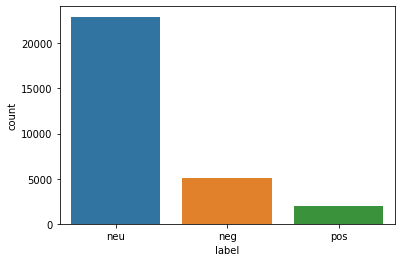

In [13]:
sns.countplot(x="label", data=cov_data)
plt.show()

In [14]:
X = cov_data['tweet']
y = cov_data['label']

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size = 0.3, random_state = 0)

In [17]:
X_train.shape

(21000,)

In [18]:
X_test.shape

(9000,)

In [19]:
df_train = pd.DataFrame()
df_train['tweet'] = X_train
df_train['label'] = y_train
df_train

,tweet,label
15925,joining fight coronavirus v,neu
10062,world snooker tour chiefs forced postpone 1mil...,neg
19376,first ever china product lasting long time,neu
6384,japanese media spread information also spread ...,neg
15976,tesla warns coronavirus hit china deliveries,neu
...,...,...
13123,watched contagion three times im pretty sure c...,neu
19648,believe everything read social media serious i...,neg
9845,well defeat coronavirus,neu
10799,south florida students told stay home possible...,neu


In [20]:
df_test = pd.DataFrame()
df_test['tweet'] = X_test
df_test['label'] = y_test
df_test

,tweet,label
8225,duterte like welcome chinese especially corona...,neu
10794,information stating infected novel coronavirus...,neu
9163,coronavirus update pandemic via,neu
26591,3000 healthcare personnel china infected coron...,pos
6631,brent recoups china virus angst fed speak play...,neu
...,...,...
21914,united panic bought striker telling come train...,neu
17453,,neu
20344,nzd usd technical bias bearish dow jones brush...,neu
1878,sounds like something catch drinking beers spr...,neu


In [21]:
df_test['label'].value_counts()

neu    6828
neg    1591
pos     581
Name: label, dtype: int64

In [22]:
tfidf_vect = TfidfVectorizer(max_features = 5000)
tfidf_vect.fit(cov_df['tweet'])
X_train_tfidf = tfidf_vect.transform(df_train['tweet'])
X_test_tfidf = tfidf_vect.transform(df_test['tweet'])

In [23]:
print(X_train_tfidf)

  (0, 1769)	0.9820380935175604
  (0, 1084)	0.1886827572418721
  (1, 4753)	0.21679885870597485
  (1, 4377)	0.3581839368019721
  (1, 3305)	0.38787712180860406
  (1, 3068)	0.34081834385453014
  (1, 1845)	0.37687686080158533
  (1, 1084)	0.05393509897533754
  (1, 892)	0.12856204218640618
  (1, 885)	0.43799262726418625
  (1, 865)	0.38205896757112445
  (1, 340)	0.24252166730208247
  (2, 4340)	0.3563588171039255
  (2, 3387)	0.5700515266669346
  (2, 2631)	0.4284729679995978
  (2, 1800)	0.29150557033010466
  (2, 1624)	0.49723786691033817
  (2, 892)	0.17955381446123975
  (3, 4582)	0.1730441577472715
  (3, 4136)	0.43007307073670525
  (3, 4029)	0.5227986522679534
  (3, 2753)	0.33257621787974656
  (3, 2410)	0.3873574556621813
  (3, 2321)	0.36446314263476604
  (3, 327)	0.34393069212846483
  :	:
  (20996, 2753)	0.30107356631588833
  (20996, 2577)	0.24262895571163948
  (20996, 2429)	0.3579601509109994
  (20996, 2311)	0.2991589368458146
  (20996, 1629)	0.3554123389683949
  (20996, 1075)	0.16762882141429

In [24]:
print(X_test_tfidf)

  (0, 4668)	0.3909188775636305
  (0, 4582)	0.14746095507261966
  (0, 2577)	0.22839221329358472
  (0, 1881)	0.3290341296197336
  (0, 1750)	0.3295590643132611
  (0, 1594)	0.39480543017551645
  (0, 1476)	0.4245753225206686
  (0, 1379)	0.2685793615429394
  (0, 1129)	0.2923419470697981
  (0, 1075)	0.1577928628605506
  (0, 899)	0.1943431301897898
  (1, 4423)	0.4065710914201624
  (1, 4068)	0.4615050139142989
  (1, 3175)	0.28231827656214786
  (1, 3001)	0.230921091615753
  (1, 2924)	0.2840853512957211
  (1, 2321)	0.31983581554730706
  (1, 2309)	0.24612015478950988
  (1, 1084)	0.05683045113923439
  (1, 1014)	0.40869920029349105
  (1, 63)	0.27357925195614435
  (2, 4562)	0.44455410757181374
  (2, 4513)	0.6131624119680688
  (2, 3142)	0.6393611858020625
  (2, 1084)	0.13274327131839564
  :	:
  (8997, 4527)	0.4418650492925762
  (8997, 4246)	0.47178528017682814
  (8997, 2432)	0.4418650492925762
  (8997, 1438)	0.37380509146228624
  (8997, 1084)	0.060765899067208036
  (8997, 543)	0.49346374227823037
  (8

In [25]:
print(tfidf_vect.vocabulary_)

{'coronavirus': 1084, 'human': 2202, 'types': 4469, 'cdc': 829, 'https': 2195, 'co': 957, 'that': 4282, 'äôs': 4878, 'üíø': 4970, 'true': 4439, 'corona': 1075, 'virus': 4582, 'swine': 4206, 'bird': 606, 'flu': 1822, 'in': 2273, 'december': 1253, 'when': 4681, 'whole': 4697, 'is': 2371, 'busy': 742, 'not': 2995, 'sars': 3714, 'possibly': 3301, 'new': 2950, 'difficult': 1355, 'to': 4349, 'confirm': 1021, 'because': 548, 'patients': 3176, 'identified': 2226, 'later': 2517, 'infection': 2311, 'disease': 1379, 'outbreak': 3105, 'news': 2955, 'from': 1892, 'the': 4284, 'who': 4692, 'middle': 2796, 'east': 1491, 'respiratory': 3615, 'syndrome': 4212, 'mers': 2777, 'cov': 1136, 'äì': 4858, 'united': 4498, 'arab': 409, 'china': 892, 'media': 2753, 'wsj': 4778, 'says': 3724, 'sources': 3985, 'tell': 4251, 'them': 4289, 'mystery': 2898, 'pneumonia': 3272, 'something': 3969, 'has': 2068, 'been': 554, 'causing': 818, 'same': 3705, 'family': 1719, 'as': 438, 'and': 350, 'virologists': 4579, 'weigh':

In [26]:
svm_model = SVC(probability = True, kernel = 'linear')
svm_model.fit(X_train_tfidf, y_train )

SVC(kernel='linear', probability=True)

In [27]:
# Predictions of test data
svm_predictions = svm_model.predict(X_test_tfidf)
test_prediction = pd.DataFrame()
test_prediction['tweet'] = X_test
test_prediction['label'] = svm_predictions
test_prediction

,tweet,label
8225,duterte like welcome chinese especially corona...,neu
10794,information stating infected novel coronavirus...,neu
9163,coronavirus update pandemic via,neu
26591,3000 healthcare personnel china infected coron...,neu
6631,brent recoups china virus angst fed speak play...,neu
...,...,...
21914,united panic bought striker telling come train...,neu
17453,,neu
20344,nzd usd technical bias bearish dow jones brush...,neu
1878,sounds like something catch drinking beers spr...,neu


In [28]:
test_prediction['label'].value_counts()

neu    7359
neg    1322
pos     319
Name: label, dtype: int64

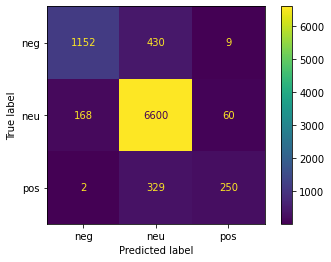

In [29]:
ConfusionMatrixDisplay.from_predictions(y_test, svm_predictions)

In [30]:
svm_accuracy = accuracy_score(svm_predictions, y_test)*100
svm_accuracy

88.91111111111111

In [31]:
print("Classification Report:")
print(classification_report(y_test, svm_predictions))

Classification Report:
              precision    recall  f1-score   support

         neg       0.87      0.72      0.79      1591
         neu       0.90      0.97      0.93      6828
         pos       0.78      0.43      0.56       581

    accuracy                           0.89      9000
   macro avg       0.85      0.71      0.76      9000
weighted avg       0.89      0.89      0.88      9000

